In [45]:
import pandas as pd
from pathlib import Path
import pyreadstat
import numpy as np
import seaborn as sns
sns.set_theme()

In [2]:
survey_path = Path('/home/selker/eop/data/malawi/MWI_2019_IHS-V_v06_M_Stata')

In [3]:
filt = pd.read_stata(survey_path / 'hh_mod_a_filt.dta')

In [6]:
(filt.hh_wgt * filt.hhsize).sum() / filt.hh_wgt.sum()   

4.398596363560515

In [17]:
prices = pd.read_stata(survey_path / 'com_ck.dta')

In [40]:

def cost_per_50_kg(row):
    if not row.ckc.isnumeric():
        return np.nan
    number_of_units = float(row.ckc)
    if row.ckd == '50 KG. BAG':
        return row.ckb / number_of_units
    elif row.ckd == 'KILOGRAMME':
        return 50 * row.ckb / number_of_units
    elif row.ckd == '90 KG. BAG':
        return (50 / 90) * row.ckb / number_of_units
    else:
        return np.nan

maize_prices = prices[prices.com_ck00a == 'Maize grain']

    

In [42]:
maize_prices['cost_per_50_kg'] = maize_prices.apply(cost_per_50_kg, axis=1) 

/data/tmp/ipykernel_136882/663907424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_prices['cost_per_50_kg'] = maize_prices.apply(cost_per_50_kg, axis=1)


/home/selker/.conda/envs/leo_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cost_per_50_kg', ylabel='Count'>

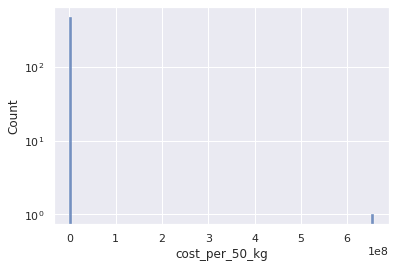

In [53]:
sns.histplot(data=maize_prices, x='cost_per_50_kg', bins=100, log_scale=(False, True))

In [59]:
maize_prices[maize_prices.cost_per_50_kg.notna()].cost_per_50_kg.median()

13500.0